Before asking the following questions, reserve 3~5 minutes for:
- greet the candidate
- briefly introduce ZG, ZO, myself, and work
- ask the candidate for past MLE experiences

After the technical questions, leave 3~5 minutes for the candidates to ask questions.

If the candidate does not know `numpy` or `python`, pseudo code is _okay_. 

# Linear Regression Interview Questions (40~50 minutes)

## Give a general use case:
At Zillow, we have many prediction problems to solve. For example, we need to select features from a home to predict the price it may sell for. Let's assume we have a dataset $X$ that has many features of a home; i.e., number of bedrooms, year of constructions, etc. And we need to predict a target $Y$ which presents the selling price of the home. 

1. What are some of the fundamental models that we can try? How to choose?
    - data type: numerial or categorical
    - choose baseline model first

Given that *Linear Regression* is commonly used for baseline trials, let's dive deep into the details of the model. 

## Sample Data 1
Present a simple 2-D $X$ that only has one feature, for illustration purpose. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

Given a generic expression of the linear regression model: $$y = mX + b$$
let
$$m = 3$$
$$b = 4$$
These $m, b$ are the ground truth of the coefficients of our model, but not necessarily the coefficients of our fitted model since we will be adding noise to the training dataset.

In [2]:
m = 3
b = 4
X = 2 * np.random.rand(100,1)
y = m * X + (b + np.random.randn(100,1))

[0, 2, 0, 15]

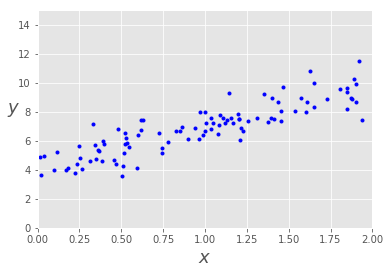

In [3]:
plt.plot(X, y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

## Analytical Solution: 
2. When we want to build a model, how to prepare the data?
    - training dataset, test dataset.
    - in matrix format, dataframes
    
3. What's the analytical solution for linear regression? Under what circumstance can we or can't we use such solution?

Closed form analytical solution: (Simplified version)

\begin{equation}
\begin{split}
y & = X \theta + \epsilon \\
X^{T} y & = X^TX\theta \\
(X^TX)^{-1}X^{T} y & = \theta \\
\text{thus, }\ \hat{\theta} & = (X^TX)^{-1}X^T y
\end{split}
\end{equation}

Exceptions: Inverse of $X^TX$ may not exist
- X is non-invertible
- X is singular

4. How to write python code for the analytical solution?

In [4]:
# analytical solution
X_b = np.c_[np.ones((100,1)), X] # add extra column of all 1's to X
theta_optimal = np.linalg.inv( X_b.T.dot(X_b) ).dot(X_b.T).dot(y) # perform the linear algebra inverse, transpose, and multiplication operations
# theta_optimal should be close to m and b respectively.
print(theta_optimal)

[[4.16797274]
 [2.80918267]]


## Gradient Descent
5. gradient descent math derivation:

#### Simple model equation:
$$\hat{Y} = mX + b$$
, where gradient $m$ and intercept $b$ are the coefficients. We want to find the optimal coefficients so that the model has the least prediction error:
$$\text{Error} = \hat{Y} - Y$$
, where $\hat{Y}$ is the predicted target value and $Y$ is the actual ground truth value.

Formally, we want to minimize the cost function:
$$\text{Cost_Function} = J_{m,b} = \frac{1}{2} \cdot \frac{1}{n} \sum_{i=1}^N (\hat{Y}_i - Y_i)^2 = \frac{1}{2} \cdot \frac{1}{n} \sum_{i=1}^N (\text{Error}_i)^2$$
by _gradually_ change the coefficients to its optimum:
$$m_{new} = m_{current} - \delta m_{current}$$
$$b_{new} = b_{current} - \delta b_{current}$$

Simplify the $\text{Cost_Function}$:
\begin{equation} 
\begin{split}
J_{m,b} & = \frac{1}{2n} \sum_{i=1}^N (\hat{Y}_i - Y_i)^2 \\
        & = \frac{1}{2n} \sum_{i=1}^N (\text{Error}_i)^2 \\
        & \sim \text{Error}^2
\end{split}
\end{equation}

Derivatives:
\begin{equation} 
\begin{split}
\frac{\partial J_{m,b}}{\partial m} & = 2 \cdot \text{Error} \cdot \frac{\partial}{\partial m} \text{Error}\\
\frac{\partial J_{m,b}}{\partial b} & = 2 \cdot \text{Error} \cdot \frac{\partial}{\partial b} \text{Error} 
\end{split}
\end{equation}

\begin{equation} 
\begin{split}
\frac{\partial}{\partial m} \text{Error} & = \frac{\partial}{\partial m}(\hat{Y} - Y) = \frac{\partial}{\partial m}(mX+b - Y) = X \\
\frac{\partial}{\partial b} \text{Error} & = \frac{\partial}{\partial b}(\hat{Y} - Y) = \frac{\partial}{\partial b}(mX+b - Y) = 1
\end{split}
\end{equation}

Chain rule:
\begin{equation} 
\begin{split}
\frac{\partial J_{m,b}}{\partial m} & = 2 \cdot \text{Error} \cdot X \cdot \text{Learning_Rate} = \text{Error} \cdot X \cdot \alpha \\
\frac{\partial J_{m,b}}{\partial b} & = 2 \cdot \text{Error} \cdot 1 \cdot \text{Learning_Rate} = \text{Error} \cdot \alpha
\end{split}
\end{equation}

Thus:
$$m_1 = m_0 - \text{Error} \cdot X \cdot \alpha$$
$$b_1 = b_0 - \text{Error} \cdot \alpha$$

#### Generalized model equation:
$$\hat{Y} = h_{\theta}(X)$$
, where $\theta$ carries all parameters of the model. $h$ is the prediction function that takes $X$ to predict $\hat{Y}$. And similar to the above, the error can be written as:
$$\text{Error} = \hat{Y} - Y = \sum_{i=1}^N (h_\theta(x_i) - y_i)$$
, where $\hat{Y}$ is the predicted target value and $Y$ is the actual ground truth value.

Re-write the cost function with $\theta$, and $h$:

$$ \text{Cost_Function} = J_{\theta} = \frac{1}{2} \cdot \frac{1}{n} \sum_{i=1}^N (\text{Error}_i)^2 = \frac{1}{2n} \sum_{i=1}^N (h_\theta(x_i) - y_i)^2$$

Using numerical approach; gradient descent, we gradually change $\theta$ to its optimal:


\begin{equation}
\begin{split}
\theta_{new} &= \theta_{current} - \delta \cdot \theta_{current} \\
         &= \theta_{current} - \underbrace{\alpha}_{\text{Learning_Rate}} \cdot \frac{\partial}{\partial \theta} J_\theta
\end{split}
\end{equation}



To get $\frac{\partial}{\partial \theta}J_\theta$:
\begin{equation}
\begin{split}
\frac{\partial}{\partial \theta} J_\theta &= \frac{\partial}{\partial \theta} \frac{1}{2n} \sum_{i=1}^N (h_\theta(x_i) - y_i)^2 \\
                                          &= \frac{1}{2n} \sum_{i=1}^N (h_\theta(x_i) - y_i) \cdot 2 \cdot \frac{\partial}{\partial \theta_j} (h_\theta(x_i) - y_i) \\
                                          &= \frac{1}{n} \sum_{i=1}^N (h_\theta(x_i) - y_i) \cdot \frac{\partial}{\partial \theta_j} (h_\theta(x_i) - y_i) \\
                                          &= \frac{1}{n} \sum_{i=1}^N (h_\theta(x_i) - y) \cdot x_i \\
\end{split}
\end{equation}

Therefore,
$$ \theta_1 = \theta_0 - \alpha \cdot \frac{1}{n} \sum_{i=1}^N (h_{\theta_0}(x_i) - y_i) \cdot x_i $$

## Linear Regression Python class 
6. Design and write a Linear Regression Python class that enables training and prediction. 
    - calculate_cost
    - gradient_descent
    - learning_rate, iterations

In [5]:
class SimpleLR:
    
    def __init__(self, op_algorithm):
        self.coef_ = self.cost_ = None
        self.op_algorithm = op_algorithm
  
    def calculate_cost(self,
                       X: np.ndarray, y: np.ndarray):
        predictions = self._predict(X)
        self.cost_ = 1/(2 * len(y)) * np.sum(np.square(predictions - y))

    # base gd
    def gradient_descent(self, X: np.ndarray, y: np.ndarray,
                         alpha: float, iterations: int):
        for i in range(iterations):
            predictions = self._predict(X)
            error = predictions - y
            self.coef_ = self.coef_ - alpha * (1/len(y)) * X.transpose().dot(error)
            self.calculate_cost(X, y)
    
    # sgd:
    def sgd(self, X: np.ndarray, y: np.ndarray, alpha: float, iterations: int):
        sampling_count = len(y)
        for i in range(iterations):
            for i in range(sampling_count):
                random_index = np.random.randint(0, sampling_count)
                X_i = X[random_index, :].reshape(1, X.shape[1])
                y_i = y[random_index].reshape(1, 1)
                prediction_i = np.dot(X_i, self.coef_)
                self.coef_ = self.coef_ - alpha * (1/len(y)) * (X_i.transpose().dot(prediction_i - y_i))
            self.calculate_cost(X, y)
    
    # minibatch gd:
    def minibatch_gd(self, X: np.ndarray, y: np.ndarray, alpha: float, iterations: int):
        total_length = len(y)
        # determine mini-batch size:
        batch_size = np.random.randint(0, total_length/3)
        if batch_size > 6 or batch_size == 0:
            batch_size = 6
            
        for i in range(iterations):
            for i in range(0, total_length, batch_size):
                X_i = X[i:i+batch_size, :]
                y_i = y[i:i+batch_size, :]
                
                prediction_i = np.dot(X_i, self.coef_)
                self.coef_ = self.coef_ - alpha * (1/len(y)) * (X_i.transpose().dot(prediction_i - y_i))
            self.calculate_cost(X, y)
    
    def add_intercept(self, X: np.ndarray):
        return np.c_[X, np.ones((X.shape[0], 1))]
            
    def fit(self, X: np.ndarray,y: np.ndarray, 
            alpha:float = 0.01, iterations:int = 1000):
        X = self.add_intercept(X)
        self.coef_ = np.random.randn(X.shape[1],1)
        if self.op_algorithm == 'gd':
            self.gradient_descent(X, y, alpha, iterations)
        elif self.op_algorithm == 'sgd':
            self.sgd(X, y, alpha, iterations)
        elif self.op_algorithm == 'minibatch':
            self.minibatch_gd(X, y, alpha, iterations)

    def _predict(self, X: np.ndarray):
        return X.dot(self.coef_)
    
    def predict(self, X: np.ndarray):
        X = self.add_intercept(X)
        return self._predict(X)

Run a test:

In [6]:
# copy from the previous section:
m = 3
b = 4
X = 2 * np.random.rand(100,1)
y = m * X + (b + np.random.randn(100,1))

In [7]:
lr = SimpleLR('gd')
lr.fit(X, y)

theta_final = lr.coef_
cost_final  = lr.cost_

print(f'm = {theta_final[0]}, b = {theta_final[1]}')
print(f'cost = {cost_final}')

m = [3.34147488], b = [3.597596]
cost = 0.5706598522731284


## Stochastic Gradient Descent

In reality, when our training data is huge. We have to figure out how to train a model computational effectively. 

Difference:
- Whole data set vs. single data point
- SGD needs more iterations to reach minima but computationally effective. 

  
7. Improve `SimpleLR` class with new `sgd` function.

In [8]:
# sgd:
# run within previous class
def sgd(self, X: np.ndarray, y: np.ndarray, alpha: float, iterations: int):
    sampling_count = len(y)
    for i in range(iterations):
        for i in range(sampling_count):
            random_index = np.random.randint(0, sampling_count)
            X_i = X[random_index, :].reshape(1, X.shape[1])
            y_i = y[random_index].reshape(1, 1)
            prediction_i = np.dot(X_i, self.coef_)
            self.coef_ = self.coef_ - alpha * (1/len(y)) * (X_i.transpose().dot(prediction_i - y_i))
        self.calculate_cost(X, y)

In [9]:
# run a test:
lr = SimpleLR('sgd')
lr.fit(X, y)

theta_final = lr.coef_
cost_final  = lr.cost_

print(f'm = {theta_final[0]}, b = {theta_final[1]}')
print(f'cost = {cost_final}')

m = [3.3601628], b = [3.57280484]
cost = 0.5723480794318191


## Mini-batch Gradient Descent (Optional)
Depends on the size of a mini-batch, the updates of coefficients can be less noisier than SGD. 

In [10]:
# run a test:
lr = SimpleLR('minibatch')
lr.fit(X, y)

theta_final = lr.coef_
cost_final  = lr.cost_

print(f'm = {theta_final[0]}, b = {theta_final[1]}')
print(f'cost = {cost_final}')

m = [3.32839583], b = [3.6116646]
cost = 0.569676177117663


## Regularization
If we overfit our training data, our predictions may not generalize well to _new_ unseen data. Introduce regularization. 

$$J_\theta = \frac{1}{2N} \sum_{i=1}^N (h_\theta(x_i) - y_i)^2 + \frac{1}{2}\cdot \lambda ||\theta||^2$$

## Cross-Validation
Implement k-fold cross validation into the SimpleLR class

In [11]:
from random import seed
from random import randrange

# Split a dataset into k folds
def cross_validation_split(dataset, folds=3):
    dataset_split = list()
    dataset_copy = list(dataset)
    
    fold_size = int(len(dataset) / folds)

    for i in range(folds):
        fold = list()
        
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
        
    return dataset_split



# test cross validation split
seed(1)
dataset = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
folds = cross_validation_split(dataset, 4)
print(folds)

[[[3], [2]], [[7], [1]], [[8], [9]], [[10], [6]]]


In [14]:
dataset.shape

(100, 1)

In [15]:
dataset = np.random.rand(100,1)
dataset_split = cross_validation_split(dataset, 4)

In [19]:
dataset_split[0]

[array([0.37458473]),
 array([0.21732737]),
 array([0.29842971]),
 array([0.52054303]),
 array([0.02764166]),
 array([0.18695714]),
 array([0.44286977]),
 array([0.06603028]),
 array([0.26503477]),
 array([0.5440444]),
 array([0.41179915]),
 array([0.53937969]),
 array([0.98687981]),
 array([0.18546414]),
 array([0.71455605]),
 array([0.57040168]),
 array([0.94473119]),
 array([0.30638842]),
 array([0.03052292]),
 array([0.90925283]),
 array([0.21445817]),
 array([0.07386257]),
 array([0.1001815]),
 array([0.87052566]),
 array([0.92768182])]